In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from scipy import fftpack as ft
from PIL import Image as im

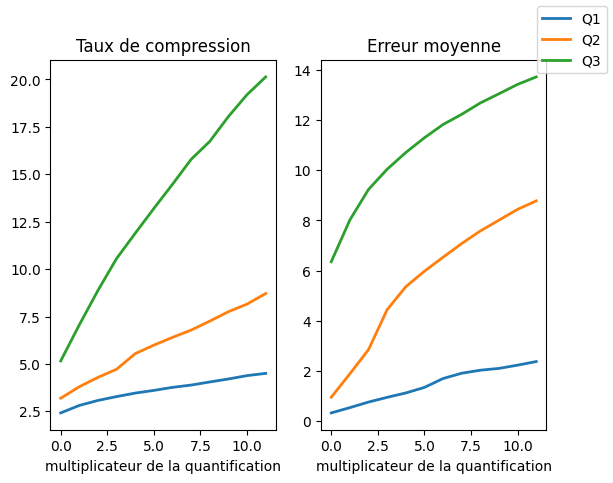

In [3]:
#Table générer par le code de JPEG 3.1 
# Spécification de la table [[Matrice de quantification [facteur multiplicatif (1 à 10) [image (1 à 10) [Taux de compression,Erreur moyenne]]*10]*10]*3]
Tables=[[[(0.518, np.float64(0.413), np.float64(0.364)), (0.207, np.float64(0.225), np.float64(0.085)), (0.373, np.float64(0.29), np.float64(0.146)), (0.331, np.float64(0.271), np.float64(0.127)), (0.964, np.float64(0.616), np.float64(0.605)), (0.216, np.float64(0.235), np.float64(0.087)), (0.386, np.float64(0.293), np.float64(0.155)), (0.619, np.float64(0.415), np.float64(0.31)), (0.16, np.float64(0.165), np.float64(0.152)), (0.385, np.float64(0.259), np.float64(0.244)), (0.383, np.float64(0.308), np.float64(0.171)), (0.416, np.float64(0.286), np.float64(0.136))], [(0.434, np.float64(0.722), np.float64(1.187)), (0.175, np.float64(0.31), np.float64(0.187)), (0.326, np.float64(0.423), np.float64(0.353)), (0.284, np.float64(0.407), np.float64(0.313)), (0.841, np.float64(1.226), np.float64(2.4)), (0.177, np.float64(0.311), np.float64(0.169)), (0.337, np.float64(0.45), np.float64(0.395)), (0.535, np.float64(0.748), np.float64(1.027)), (0.12, np.float64(0.311), np.float64(0.571)), (0.324, np.float64(0.493), np.float64(0.903)), (0.336, np.float64(0.497), np.float64(0.552)), (0.373, np.float64(0.417), np.float64(0.318))], [(0.383, np.float64(0.973), np.float64(2.217)), (0.164, np.float64(0.397), np.float64(0.337)), (0.305, np.float64(0.577), np.float64(0.693)), (0.265, np.float64(0.522), np.float64(0.531)), (0.771, np.float64(1.837), np.float64(5.391)), (0.168, np.float64(0.393), np.float64(0.292)), (0.307, np.float64(0.618), np.float64(0.777)), (0.494, np.float64(1.091), np.float64(2.175)), (0.101, np.float64(0.466), np.float64(1.139)), (0.291, np.float64(0.709), np.float64(1.896)), (0.309, np.float64(0.68), np.float64(1.126)), (0.34, np.float64(0.719), np.float64(1.121))], [(0.362, np.float64(1.185), np.float64(3.332)), (0.159, np.float64(0.517), np.float64(0.591)), (0.292, np.float64(0.76), np.float64(1.243)), (0.253, np.float64(0.662), np.float64(0.859)), (0.721, np.float64(2.453), np.float64(9.607)), (0.151, np.float64(0.498), np.float64(0.475)), (0.288, np.float64(0.797), np.float64(1.307)), (0.473, np.float64(1.421), np.float64(3.655)), (0.086, np.float64(0.526), np.float64(1.797)), (0.274, np.float64(0.907), np.float64(3.142)), (0.284, np.float64(0.834), np.float64(1.62)), (0.313, np.float64(0.686), np.float64(0.849))], [(0.329, np.float64(1.348), np.float64(4.217)), (0.15, np.float64(0.553), np.float64(0.711)), (0.286, np.float64(0.909), np.float64(1.739)), (0.242, np.float64(0.874), np.float64(1.48)), (0.694, np.float64(3.069), np.float64(15.022)), (0.138, np.float64(0.572), np.float64(0.561)), (0.278, np.float64(0.949), np.float64(1.807)), (0.446, np.float64(1.503), np.float64(4.061)), (0.075, np.float64(0.682), np.float64(2.479)), (0.254, np.float64(1.069), np.float64(4.389)), (0.271, np.float64(0.787), np.float64(1.177)), (0.299, np.float64(1.034), np.float64(2.218))], [(0.318, np.float64(1.515), np.float64(5.453)), (0.15, np.float64(0.658), np.float64(1.062)), (0.284, np.float64(1.016), np.float64(2.23)), (0.239, np.float64(0.883), np.float64(1.57)), (0.645, np.float64(3.681), np.float64(21.642)), (0.131, np.float64(0.736), np.float64(0.97)), (0.276, np.float64(1.104), np.float64(2.532)), (0.426, np.float64(1.852), np.float64(6.224)), (0.066, np.float64(0.738), np.float64(3.087)), (0.245, np.float64(1.227), np.float64(5.827)), (0.264, np.float64(1.123), np.float64(2.624)), (0.282, np.float64(1.468), np.float64(4.74))], [(0.306, np.float64(1.826), np.float64(7.815)), (0.144, np.float64(0.837), np.float64(2.052)), (0.269, np.float64(1.434), np.float64(4.899)), (0.234, np.float64(1.185), np.float64(2.968)), (0.627, np.float64(4.302), np.float64(29.457)), (0.121, np.float64(0.899), np.float64(1.59)), (0.261, np.float64(1.392), np.float64(4.333)), (0.418, np.float64(2.719), np.float64(13.571)), (0.06, np.float64(0.751), np.float64(3.604)), (0.23, np.float64(1.487), np.float64(6.384)), (0.248, np.float64(1.554), np.float64(5.649)), (0.267, np.float64(1.875), np.float64(8.077))], [(0.297, np.float64(1.957), np.float64(8.882)), (0.144, np.float64(0.925), np.float64(2.329)), (0.271, np.float64(1.638), np.float64(6.121)), (0.228, np.float64(1.398), np.float64(4.02)), (0.618, np.float64(4.92), np.float64(38.58)), (0.108, np.float64(1.061), np.float64(2.404)), (0.254, np.float64(1.552), np.float64(5.179)), (0.408, np.float64(2.92), np.float64(15.614)), (0.056, np.float64(0.75), np.float64(4.045)), (0.223, np.float64(1.459), np.float64(8.294)), (0.232, np.float64(1.958), np.float64(9.465)), (0.247, np.float64(2.261), np.float64(11.986))], [(0.286, np.float64(1.915), np.float64(8.242)), (0.137, np.float64(0.824), np.float64(1.665)), (0.266, np.float64(1.585), np.float64(5.384)), (0.221, np.float64(1.349), np.float64(3.588)), (0.574, np.float64(5.522), np.float64(48.644)), (0.098, np.float64(1.205), np.float64(3.223)), (0.257, np.float64(1.588), np.float64(5.172)), (0.411, np.float64(2.721), np.float64(13.207)), (0.052, np.float64(0.821), np.float64(4.443)), (0.22, np.float64(1.929), np.float64(11.673)), (0.217, np.float64(2.333), np.float64(14.091)), (0.222, np.float64(2.452), np.float64(14.072))], [(0.278, np.float64(1.883), np.float64(7.917)), (0.135, np.float64(0.82), np.float64(1.392)), (0.257, np.float64(1.52), np.float64(4.79)), (0.225, np.float64(1.352), np.float64(3.482)), (0.563, np.float64(6.141), np.float64(60.197)), (0.091, np.float64(1.324), np.float64(4.06)), (0.242, np.float64(1.572), np.float64(4.908)), (0.388, np.float64(2.53), np.float64(11.175)), (0.048, np.float64(0.887), np.float64(4.807)), (0.216, np.float64(1.867), np.float64(13.776)), (0.202, np.float64(2.659), np.float64(18.699)), (0.206, np.float64(2.562), np.float64(15.322))], [(0.271, np.float64(1.935), np.float64(8.353)), (0.134, np.float64(0.939), np.float64(1.724)), (0.245, np.float64(1.481), np.float64(4.231)), (0.214, np.float64(1.362), np.float64(3.407)), (0.543, np.float64(6.734), np.float64(72.411)), (0.079, np.float64(1.414), np.float64(4.757)), (0.235, np.float64(1.607), np.float64(4.964)), (0.38, np.float64(2.48), np.float64(10.714)), (0.044, np.float64(0.951), np.float64(5.154)), (0.21, np.float64(2.218), np.float64(13.924)), (0.182, np.float64(2.854), np.float64(21.78)), (0.198, np.float64(2.687), np.float64(16.655))], [(0.268, np.float64(2.111), np.float64(10.108)), (0.132, np.float64(1.236), np.float64(3.169)), (0.247, np.float64(1.653), np.float64(5.16)), (0.211, np.float64(1.519), np.float64(4.137)), (0.528, np.float64(7.346), np.float64(86.024)), (0.07, np.float64(1.483), np.float64(5.227)), (0.232, np.float64(1.755), np.float64(5.818)), (0.371, np.float64(2.693), np.float64(12.818)), (0.042, np.float64(1.018), np.float64(5.49)), (0.206, np.float64(1.81), np.float64(12.662)), (0.159, np.float64(2.931), np.float64(23.191)), (0.198, np.float64(2.833), np.float64(18.464))]], [[(0.357, np.float64(1.234), np.float64(3.782)), (0.169, np.float64(0.395), np.float64(0.406)), (0.306, np.float64(0.682), np.float64(1.059)), (0.265, np.float64(0.636), np.float64(0.826)), (0.733, np.float64(3.06), np.float64(14.97)), (0.171, np.float64(0.258), np.float64(0.102)), (0.3, np.float64(0.755), np.float64(1.215)), (0.474, np.float64(1.459), np.float64(3.932)), (0.088, np.float64(0.594), np.float64(2.423)), (0.265, np.float64(1.032), np.float64(4.233)), (0.292, np.float64(0.276), np.float64(0.165)), (0.336, np.float64(0.897), np.float64(2.06))], [(0.305, np.float64(1.621), np.float64(6.207)), (0.153, np.float64(0.58), np.float64(0.856)), (0.279, np.float64(1.128), np.float64(2.712)), (0.243, np.float64(0.954), np.float64(1.796)), (0.591, np.float64(6.131), np.float64(60.03)), (0.125, np.float64(1.184), np.float64(3.916)), (0.275, np.float64(1.132), np.float64(2.679)), (0.424, np.float64(2.173), np.float64(8.483)), (0.059, np.float64(0.767), np.float64(4.507)), (0.232, np.float64(1.864), np.float64(14.086)), (0.233, np.float64(2.652), np.float64(20.729)), (0.237, np.float64(2.37), np.float64(14.355))], [(0.288, np.float64(3.049), np.float64(22.506)), (0.141, np.float64(1.249), np.float64(6.224)), (0.261, np.float64(2.347), np.float64(14.669)), (0.23, np.float64(2.016), np.float64(9.777)), (0.523, np.float64(9.126), np.float64(133.479)), (0.083, np.float64(1.311), np.float64(4.792)), (0.247, np.float64(2.402), np.float64(13.992)), (0.386, np.float64(4.444), np.float64(37.001)), (0.046, np.float64(0.884), np.float64(5.564)), (0.211, np.float64(1.346), np.float64(7.94)), (0.17, np.float64(2.95), np.float64(25.716)), (0.208, np.float64(2.995), np.float64(23.767))], [(0.253, np.float64(4.975), np.float64(61.686)), (0.128, np.float64(2.152), np.float64(19.294)), (0.24, np.float64(4.444), np.float64(54.679)), (0.212, np.float64(3.707), np.float64(33.839)), (0.476, np.float64(12.206), np.float64(238.483)), (0.07, np.float64(1.523), np.float64(6.951)), (0.229, np.float64(4.512), np.float64(49.882)), (0.362, np.float64(8.568), np.float64(137.765)), (0.039, np.float64(0.911), np.float64(6.393)), (0.198, np.float64(3.222), np.float64(40.788)), (0.154, np.float64(3.593), np.float64(40.493)), (0.179, np.float64(3.448), np.float64(31.889))], [(0.222, np.float64(5.852), np.float64(85.665)), (0.114, np.float64(2.387), np.float64(25.268)), (0.195, np.float64(5.278), np.float64(78.382)), (0.169, np.float64(4.34), np.float64(46.921)), (0.434, np.float64(15.24), np.float64(371.372)), (0.058, np.float64(1.613), np.float64(7.959)), (0.183, np.float64(5.403), np.float64(72.491)), (0.285, np.float64(10.747), np.float64(216.323)), (0.034, np.float64(1.037), np.float64(7.104)), (0.184, np.float64(4.694), np.float64(88.493)), (0.128, np.float64(3.817), np.float64(46.936)), (0.158, np.float64(3.849), np.float64(40.735))], [(0.205, np.float64(6.358), np.float64(98.464)), (0.107, np.float64(2.638), np.float64(29.272)), (0.182, np.float64(5.635), np.float64(88.677)), (0.163, np.float64(4.64), np.float64(52.734)), (0.402, np.float64(18.131), np.float64(527.335)), (0.052, np.float64(1.739), np.float64(9.636)), (0.174, np.float64(5.801), np.float64(81.513)), (0.257, np.float64(11.434), np.float64(243.983)), (0.03, np.float64(1.087), np.float64(7.8)), (0.165, np.float64(5.841), np.float64(140.419)), (0.117, np.float64(4.189), np.float64(58.209)), (0.148, np.float64(4.195), np.float64(47.674))], [(0.196, np.float64(6.95), np.float64(115.722)), (0.104, np.float64(2.984), np.float64(35.608)), (0.177, np.float64(6.045), np.float64(100.445)), (0.157, np.float64(5.044), np.float64(61.343)), (0.386, np.float64(20.804), np.float64(694.103)), (0.046, np.float64(1.8), np.float64(10.65)), (0.157, np.float64(6.272), np.float64(94.254)), (0.239, np.float64(12.194), np.float64(274.657)), (0.027, np.float64(1.088), np.float64(8.463)), (0.143, np.float64(6.34), np.float64(157.157)), (0.106, np.float64(4.38), np.float64(64.585)), (0.136, np.float64(4.478), np.float64(54.46))], [(0.185, np.float64(7.609), np.float64(137.647)), (0.097, np.float64(3.305), np.float64(42.168)), (0.168, np.float64(6.675), np.float64(117.549)), (0.146, np.float64(5.496), np.float64(70.639)), (0.357, np.float64(23.234), np.float64(867.694)), (0.042, np.float64(1.877), np.float64(12.125)), (0.154, np.float64(6.828), np.float64(110.067)), (0.226, np.float64(13.064), np.float64(316.366)), (0.025, np.float64(1.082), np.float64(9.077)), (0.137, np.float64(6.418), np.float64(171.413)), (0.103, np.float64(4.608), np.float64(73.756)), (0.128, np.float64(4.752), np.float64(61.119))], [(0.174, np.float64(8.108), np.float64(155.94)), (0.092, np.float64(3.525), np.float64(46.987)), (0.158, np.float64(7.139), np.float64(131.365)), (0.137, np.float64(5.874), np.float64(78.729)), (0.333, np.float64(25.476), np.float64(1043.082)), (0.039, np.float64(1.952), np.float64(13.138)), (0.144, np.float64(7.197), np.float64(121.347)), (0.204, np.float64(13.779), np.float64(353.616)), (0.022, np.float64(1.155), np.float64(9.667)), (0.134, np.float64(6.999), np.float64(190.055)), (0.095, np.float64(4.783), np.float64(79.688)), (0.121, np.float64(4.988), np.float64(66.982))], [(0.164, np.float64(8.515), np.float64(169.965)), (0.089, np.float64(3.789), np.float64(51.683)), (0.138, np.float64(7.532), np.float64(142.543)), (0.127, np.float64(6.236), np.float64(86.698)), (0.322, np.float64(27.467), np.float64(1217.73)), (0.038, np.float64(2.024), np.float64(14.39)), (0.128, np.float64(7.568), np.float64(132.195)), (0.188, np.float64(14.299), np.float64(382.421)), (0.02, np.float64(1.221), np.float64(10.211)), (0.13, np.float64(7.301), np.float64(217.826)), (0.089, np.float64(4.974), np.float64(87.527)), (0.114, np.float64(5.22), np.float64(72.937))], [(0.16, np.float64(8.894), np.float64(184.807)), (0.083, np.float64(4.033), np.float64(56.604)), (0.14, np.float64(7.926), np.float64(153.258)), (0.124, np.float64(6.576), np.float64(94.389)), (0.293, np.float64(29.293), np.float64(1388.212)), (0.034, np.float64(2.067), np.float64(15.315)), (0.127, np.float64(7.886), np.float64(141.295)), (0.173, np.float64(14.714), np.float64(404.571)), (0.019, np.float64(1.277), np.float64(10.752)), (0.125, np.float64(8.144), np.float64(250.53)), (0.084, np.float64(5.115), np.float64(93.294)), (0.109, np.float64(5.417), np.float64(78.42))], [(0.149, np.float64(9.211), np.float64(198.866)), (0.077, np.float64(4.262), np.float64(61.19)), (0.131, np.float64(8.338), np.float64(164.749)), (0.116, np.float64(6.917), np.float64(102.384)), (0.275, np.float64(30.934), np.float64(1552.951)), (0.032, np.float64(2.129), np.float64(16.454)), (0.115, np.float64(8.173), np.float64(149.814)), (0.163, np.float64(15.027), np.float64(424.229)), (0.017, np.float64(1.308), np.float64(11.231)), (0.116, np.float64(8.202), np.float64(279.036)), (0.082, np.float64(5.274), np.float64(100.568)), (0.104, np.float64(5.61), np.float64(83.943))]], [[(0.235, np.float64(6.057), np.float64(98.517)), (0.124, np.float64(2.372), np.float64(29.215)), (0.226, np.float64(5.031), np.float64(77.349)), (0.196, np.float64(3.992), np.float64(41.508)), (0.411, np.float64(27.395), np.float64(1257.373)), (0.072, np.float64(1.529), np.float64(7.162)), (0.214, np.float64(4.986), np.float64(64.586)), (0.309, np.float64(10.853), np.float64(232.651)), (0.041, np.float64(0.913), np.float64(6.415)), (0.176, np.float64(5.804), np.float64(155.482)), (0.145, np.float64(3.672), np.float64(43.375)), (0.176, np.float64(3.632), np.float64(37.949))], [(0.186, np.float64(7.781), np.float64(147.782)), (0.096, np.float64(3.305), np.float64(45.226)), (0.167, np.float64(6.69), np.float64(121.887)), (0.146, np.float64(5.461), np.float64(70.699)), (0.301, np.float64(33.304), np.float64(1947.435)), (0.045, np.float64(1.894), np.float64(12.22)), (0.148, np.float64(6.836), np.float64(111.248)), (0.217, np.float64(13.355), np.float64(338.443)), (0.027, np.float64(1.092), np.float64(9.163)), (0.133, np.float64(7.136), np.float64(219.65)), (0.103, np.float64(4.621), np.float64(73.552)), (0.129, np.float64(4.797), np.float64(62.368))], [(0.151, np.float64(9.291), np.float64(203.365)), (0.078, np.float64(4.315), np.float64(62.653)), (0.126, np.float64(8.329), np.float64(166.022)), (0.114, np.float64(6.933), np.float64(102.296)), (0.243, np.float64(36.126), np.float64(2246.253)), (0.036, np.float64(2.102), np.float64(16.536)), (0.119, np.float64(8.185), np.float64(150.208)), (0.156, np.float64(15.098), np.float64(429.663)), (0.02, np.float64(1.207), np.float64(11.297)), (0.114, np.float64(8.391), np.float64(295.187)), (0.086, np.float64(5.259), np.float64(100.598)), (0.108, np.float64(5.65), np.float64(84.588))], [(0.131, np.float64(10.315), np.float64(246.912)), (0.063, np.float64(4.909), np.float64(75.751)), (0.105, np.float64(9.163), np.float64(194.091)), (0.088, np.float64(7.661), np.float64(121.229)), (0.206, np.float64(38.565), np.float64(2528.399)), (0.03, np.float64(2.23), np.float64(20.08)), (0.095, np.float64(8.962), np.float64(177.18)), (0.133, np.float64(16.243), np.float64(495.483)), (0.013, np.float64(1.126), np.float64(12.363)), (0.104, np.float64(9.306), np.float64(356.61)), (0.075, np.float64(5.733), np.float64(124.235)), (0.093, np.float64(6.361), np.float64(104.859))], [(0.119, np.float64(11.097), np.float64(288.973)), (0.056, np.float64(5.284), np.float64(87.56)), (0.096, np.float64(9.772), np.float64(218.871)), (0.08, np.float64(8.202), np.float64(138.24)), (0.173, np.float64(40.615), np.float64(2794.721)), (0.028, np.float64(2.341), np.float64(23.264)), (0.086, np.float64(9.604), np.float64(202.491)), (0.119, np.float64(17.223), np.float64(554.349)), (0.012, np.float64(1.214), np.float64(12.983)), (0.091, np.float64(10.121), np.float64(420.598)), (0.066, np.float64(6.138), np.float64(145.63)), (0.083, np.float64(6.957), np.float64(123.249))], [(0.109, np.float64(11.84), np.float64(328.073)), (0.053, np.float64(5.657), np.float64(99.309)), (0.087, np.float64(10.442), np.float64(244.11)), (0.071, np.float64(8.721), np.float64(155.026)), (0.153, np.float64(42.27), np.float64(3029.508)), (0.026, np.float64(2.421), np.float64(26.248)), (0.077, np.float64(10.134), np.float64(227.005)), (0.103, np.float64(18.038), np.float64(605.566)), (0.01, np.float64(1.211), np.float64(13.403)), (0.082, np.float64(10.903), np.float64(482.312)), (0.062, np.float64(6.491), np.float64(166.725)), (0.076, np.float64(7.511), np.float64(141.645))], [(0.1, np.float64(12.454), np.float64(364.642)), (0.046, np.float64(5.961), np.float64(110.138)), (0.078, np.float64(11.074), np.float64(269.833)), (0.064, np.float64(9.232), np.float64(172.902)), (0.134, np.float64(43.694), np.float64(3232.565)), (0.025, np.float64(2.483), np.float64(29.179)), (0.069, np.float64(10.663), np.float64(249.001)), (0.098, np.float64(18.693), np.float64(649.556)), (0.009, np.float64(1.166), np.float64(13.644)), (0.077, np.float64(11.711), np.float64(533.647)), (0.058, np.float64(6.853), np.float64(188.778)), (0.071, np.float64(8.018), np.float64(159.627))], [(0.094, np.float64(13.023), np.float64(400.471)), (0.044, np.float64(6.219), np.float64(119.619)), (0.071, np.float64(11.599), np.float64(292.584)), (0.059, np.float64(9.562), np.float64(186.47)), (0.121, np.float64(44.875), np.float64(3405.584)), (0.023, np.float64(2.526), np.float64(31.83)), (0.062, np.float64(11.049), np.float64(267.949)), (0.085, np.float64(19.235), np.float64(691.219)), (0.008, np.float64(1.125), np.float64(13.863)), (0.072, np.float64(12.043), np.float64(582.297)), (0.054, np.float64(7.161), np.float64(210.904)), (0.067, np.float64(8.469), np.float64(177.342))], [(0.091, np.float64(13.691), np.float64(438.978)), (0.041, np.float64(6.485), np.float64(129.479)), (0.067, np.float64(12.108), np.float64(314.734)), (0.057, np.float64(9.977), np.float64(201.656)), (0.11, np.float64(45.879), np.float64(3554.289)), (0.022, np.float64(2.598), np.float64(34.333)), (0.06, np.float64(11.503), np.float64(289.253)), (0.08, np.float64(19.707), np.float64(726.307)), (0.008, np.float64(1.16), np.float64(14.012)), (0.067, np.float64(12.771), np.float64(630.756)), (0.052, np.float64(7.505), np.float64(233.182)), (0.062, np.float64(8.93), np.float64(194.855))], [(0.085, np.float64(14.227), np.float64(478.308)), (0.039, np.float64(6.694), np.float64(137.723)), (0.06, np.float64(12.539), np.float64(336.398)), (0.052, np.float64(10.341), np.float64(216.827)), (0.101, np.float64(46.862), np.float64(3685.654)), (0.02, np.float64(2.662), np.float64(37.022)), (0.055, np.float64(11.864), np.float64(310.294)), (0.074, np.float64(20.191), np.float64(765.767)), (0.007, np.float64(1.193), np.float64(14.099)), (0.065, np.float64(13.017), np.float64(675.665)), (0.049, np.float64(7.789), np.float64(254.152)), (0.058, np.float64(9.353), np.float64(212.839))], [(0.081, np.float64(14.776), np.float64(516.867)), (0.037, np.float64(6.885), np.float64(145.043)), (0.056, np.float64(12.889), np.float64(355.905)), (0.048, np.float64(10.663), np.float64(230.821)), (0.093, np.float64(47.681), np.float64(3801.929)), (0.019, np.float64(2.708), np.float64(39.749)), (0.052, np.float64(12.147), np.float64(326.261)), (0.068, np.float64(20.645), np.float64(799.724)), (0.007, np.float64(1.223), np.float64(14.143)), (0.061, np.float64(13.748), np.float64(717.809)), (0.048, np.float64(8.057), np.float64(275.361)), (0.055, np.float64(9.794), np.float64(231.364))], [(0.078, np.float64(15.336), np.float64(556.792)), (0.036, np.float64(7.044), np.float64(152.588)), (0.052, np.float64(13.219), np.float64(372.508)), (0.046, np.float64(10.938), np.float64(243.794)), (0.087, np.float64(48.443), np.float64(3907.732)), (0.02, np.float64(2.767), np.float64(42.41)), (0.049, np.float64(12.44), np.float64(342.576)), (0.066, np.float64(21.056), np.float64(832.252)), (0.007, np.float64(1.264), np.float64(14.174)), (0.059, np.float64(13.789), np.float64(759.037)), (0.044, np.float64(8.303), np.float64(296.272)), (0.052, np.float64(10.197), np.float64(248.92))]]]
Tables=np.array(Tables)
mean=np.mean(Tables, axis=2)

fig, axs = plt.subplots(ncols=2, nrows=1)          
axs[0].plot(range(12), 1/np.delete(mean,[1,2],2)[0], linewidth=2.0, label="Q1")
axs[0].plot(range(12), 1/np.delete(mean,[1,2],2)[1], linewidth=2.0, label="Q2")
axs[0].plot(range(12), 1/np.delete(mean,[1,2],2)[2], linewidth=2.0, label="Q3")
axs[0].set_title('Taux de compression')
axs[0].set_xlabel('multiplicateur de la quantification')
plt.xlabel('multiplicateur de la DCT')
axs[1].plot(range(12), np.delete(mean,[0,2],2)[0], linewidth=2.0)
axs[1].plot(range(12), np.delete(mean,[0,2],2)[1], linewidth=2.0)
axs[1].plot(range(12), np.delete(mean,[0,2],2)[2], linewidth=2.0)
axs[1].set_title('Erreur moyenne')
axs[1].set_xlabel('multiplicateur de la quantification')
fig.legend(loc='outside upper right')
plt.show()

In [4]:
#Valeur clé
Tab_clé=[Tables[0][0],Tables[1][0],Tables[2][0]]
Tab_clé=np.mean(Tab_clé,1)
print(Tab_clé)


[[  0.41316667   0.31466667   0.21516667]
 [  0.313        0.93983333   2.93108333]
 [  0.19375      6.353      170.96516667]]


[0.2926470588235294, 0.16838311019567456, 0.18410041841004185, 0.1827637444279346, 0.4931350114416476, 0.24791231732776617, 0.20715096481271283, 0.2323529411764706, 0.38596491228070173, 0.5053921568627451, 0.4098867147270855, 0.4510016242555495]


/var/folders/sb/2v07rcg96074m1qyw4wc0m3m0000gn/T/ipykernel_7205/1265659186.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i][j].set_ylim([0, m])


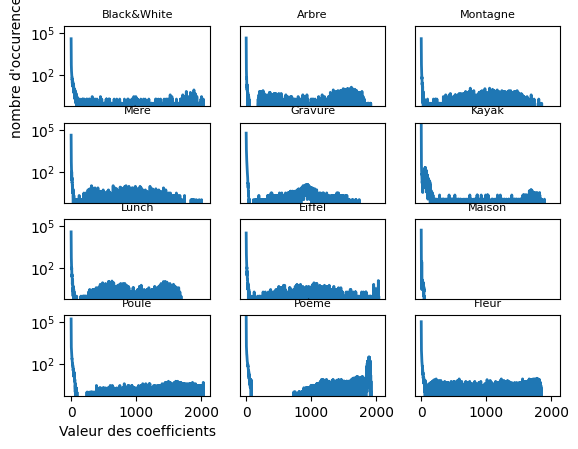

In [5]:
#Coefficient
coef=[[40416, 2202, 918, 530, 270, 292, 198, 157, 130, 130, 108, 91, 71, 71, 72, 46, 58, 56, 26, 49, 31, 41, 36, 17, 23, 19, 35, 18, 22, 24, 26, 20, 13, 13, 14, 13, 12, 13, 11, 18, 6, 11, 10, 12, 8, 9, 8, 7, 5, 11, 7, 8, 9, 4, 9, 5, 5, 4, 2, 6, 3, 3, 3, 8, 3, 2, 2, 2, 4, 6, 2, 2, 1, 3, 3, 3, 2, 5, 3, 2, 2, 2, 1, 3, 1, 1, 0, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 7, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 2, 0, 3, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 4, 0, 5, 1, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], [45653, 1124, 745, 260, 140, 114, 58, 69, 42, 18, 25, 20, 14, 22, 9, 18, 9, 7, 14, 6, 13, 4, 5, 4, 3, 6, 1, 3, 0, 1, 0, 2, 1, 4, 1, 0, 2, 1, 1, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 2, 1, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 3, 5, 2, 3, 0, 1, 0, 0, 0, 2, 7, 6, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 5, 2, 0, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 1, 0, 1, 0, 0, 8, 2, 0, 0, 0, 1, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 8, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 2, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 1, 0, 0, 0, 0, 1, 10, 4, 0, 0, 0, 0, 0, 0, 0, 10, 2, 0, 0, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 1, 9, 1, 0, 0, 0, 0, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 1, 1, 14, 1, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 1, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 5, 2, 2, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 6, 2, 1, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [40819, 2314, 1541, 574, 315, 306, 155, 124, 97, 101, 56, 74, 28, 53, 21, 29, 16, 18, 11, 13, 6, 12, 16, 5, 6, 6, 1, 7, 4, 6, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 1, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0, 0, 1, 11, 1, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 1, 12, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 10, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 1, 1, 0, 8, 0, 0, 0, 0, 0, 0, 1, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 1, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 2, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 2, 6, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [40480, 1803, 1428, 467, 236, 242, 118, 104, 50, 98, 43, 56, 23, 38, 19, 16, 18, 10, 10, 8, 11, 4, 7, 6, 3, 3, 3, 6, 3, 5, 2, 1, 0, 2, 2, 1, 0, 3, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 10, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 1, 0, 0, 0, 1, 5, 2, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 7, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 0, 0, 2, 0, 7, 1, 0, 0, 1, 0, 0, 0, 0, 10, 1, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 9, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [56306, 12763, 6367, 3756, 2444, 1719, 1320, 1022, 803, 566, 436, 330, 267, 239, 184, 165, 110, 104, 82, 70, 62, 55, 37, 36, 22, 21, 13, 15, 16, 8, 7, 11, 7, 6, 5, 2, 4, 2, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 3, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 3, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 3, 1, 1, 1, 3, 1, 1, 1, 0, 3, 3, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 3, 0, 0, 0, 1, 2, 2, 1, 0, 4, 1, 2, 3, 0, 1, 0, 2, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 3, 1, 2, 1, 3, 0, 2, 1, 1, 4, 1, 1, 1, 2, 2, 0, 2, 1, 3, 2, 2, 4, 0, 3, 2, 1, 1, 3, 1, 3, 1, 3, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 3, 2, 3, 1, 3, 0, 0, 4, 3, 0, 2, 4, 4, 2, 2, 1, 1, 2, 4, 2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 4, 0, 4, 0, 1, 1, 0, 4, 5, 3, 0, 2, 0, 4, 1, 2, 3, 3, 1, 1, 3, 3, 4, 1, 2, 0, 1, 3, 4, 1, 6, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 5, 3, 2, 5, 4, 2, 1, 2, 4, 4, 4, 3, 4, 1, 5, 4, 2, 1, 2, 2, 1, 4, 4, 2, 0, 3, 2, 3, 3, 3, 7, 5, 4, 2, 5, 3, 3, 1, 6, 5, 4, 2, 2, 4, 1, 2, 3, 4, 6, 5, 3, 5, 5, 9, 2, 3, 4, 4, 10, 7, 1, 7, 5, 1, 1, 5, 4, 5, 5, 7, 5, 2, 3, 3, 3, 8, 4, 4, 4, 8, 7, 5, 3, 4, 4, 3, 6, 10, 11, 5, 7, 8, 7, 2, 8, 6, 10, 3, 9, 5, 6, 9, 5, 5, 2, 9, 12, 10, 11, 3, 3, 8, 9, 6, 2, 8, 2, 3, 5, 7, 1, 9, 5, 3, 5, 10, 3, 5, 10, 4, 12, 8, 6, 4, 11, 5, 7, 6, 5, 8, 7, 6, 6, 6, 6, 2, 2, 7, 5, 4, 7, 4, 6, 7, 7, 9, 5, 6, 4, 6, 1, 4, 4, 6, 5, 4, 3, 4, 5, 6, 3, 7, 6, 3, 5, 3, 6, 4, 2, 1, 7, 1, 6, 5, 6, 5, 3, 1, 0, 3, 3, 5, 4, 3, 4, 6, 7, 3, 2, 4, 5, 3, 4, 4, 1, 5, 5, 6, 2, 6, 6, 3, 1, 4, 1, 3, 5, 0, 4, 2, 5, 4, 1, 3, 2, 2, 0, 1, 3, 3, 0, 1, 1, 3, 6, 0, 3, 1, 2, 1, 2, 1, 1, 1, 5, 2, 1, 2, 0, 1, 3, 1, 1, 4, 2, 2, 3, 2, 0, 1, 1, 2, 2, 3, 4, 5, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 3, 3, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 3, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 3, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 3, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 3, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 3, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [236323, 4967, 849, 293, 169, 106, 81, 60, 62, 45, 41, 28, 24, 21, 14, 14, 20, 19, 8, 10, 10, 5, 6, 3, 9, 6, 7, 12, 8, 8, 10, 6, 20, 18, 17, 30, 34, 24, 51, 29, 38, 67, 34, 39, 54, 29, 52, 78, 33, 72, 75, 30, 134, 64, 41, 152, 60, 24, 182, 44, 22, 186, 26, 19, 189, 14, 22, 149, 26, 16, 136, 21, 14, 114, 22, 8, 110, 18, 8, 104, 8, 8, 65, 11, 8, 60, 10, 3, 55, 16, 3, 57, 8, 3, 45, 6, 10, 40, 4, 5, 32, 8, 1, 29, 5, 4, 23, 9, 5, 32, 14, 4, 24, 8, 5, 26, 9, 4, 17, 5, 4, 19, 7, 8, 19, 9, 2, 10, 4, 7, 20, 8, 6, 16, 6, 6, 11, 5, 0, 9, 7, 1, 3, 1, 5, 5, 3, 1, 4, 1, 2, 4, 2, 3, 1, 1, 0, 3, 2, 1, 1, 3, 2, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 4, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 3, 1, 1, 5, 0, 1, 3, 0, 1, 1, 0, 1, 3, 0, 2, 2, 0, 1, 3, 0, 0, 4, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [38546, 2690, 1369, 574, 289, 280, 156, 112, 85, 106, 54, 55, 24, 36, 27, 30, 21, 19, 7, 9, 8, 9, 10, 15, 8, 6, 5, 3, 1, 1, 1, 4, 2, 2, 5, 1, 3, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 9, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 11, 2, 1, 0, 0, 0, 0, 0, 0, 11, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 12, 1, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 5, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 1, 11, 2, 0, 0, 0, 0, 0, 0, 0, 10, 1, 0, 0, 0, 0, 0, 0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 10, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 8, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [32053, 4515, 1507, 957, 518, 432, 248, 219, 175, 147, 90, 113, 34, 64, 29, 50, 24, 23, 17, 16, 17, 16, 13, 10, 7, 9, 3, 5, 3, 3, 7, 5, 3, 5, 0, 0, 2, 3, 4, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 4, 2, 0, 0, 0, 1, 0, 0, 1, 3, 2, 4, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 1, 1, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 5, 0, 2, 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 5, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 1, 0, 0, 0, 0, 2, 8, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 1, 5, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 3, 0, 0, 0, 1, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 7, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 1, 0, 0, 0, 2, 0, 3, 1, 1, 0, 0, 1, 0, 1, 2, 4, 3, 0, 0, 0, 0, 0, 0, 1, 13, 0, 0, 0, 0, 0, 1, 0], [51421, 763, 121, 27, 11, 7, 20, 3, 279, 5, 4, 7, 14, 8, 12, 14, 9, 5, 9, 9, 4, 11, 3, 10, 9, 3, 8, 8, 6, 8, 9, 4, 9, 1, 6, 6, 2, 2, 5, 3, 4, 2, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [178586, 8650, 3210, 1679, 1374, 950, 787, 649, 516, 444, 405, 324, 315, 239, 253, 215, 185, 160, 145, 117, 117, 99, 108, 96, 91, 82, 86, 63, 65, 60, 55, 35, 46, 45, 47, 40, 28, 25, 35, 24, 23, 28, 29, 14, 26, 12, 15, 13, 21, 16, 15, 6, 15, 11, 9, 6, 8, 8, 5, 6, 2, 2, 2, 1, 3, 2, 0, 2, 4, 4, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 4, 0, 1, 3, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 3, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1, 3, 1, 1, 0, 1, 0, 0, 3, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 0, 1, 2, 3, 0, 0, 2, 1, 3, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 1, 0, 3, 1, 4, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 4, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 4, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 3, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 1, 0, 0, 1, 3, 2, 0, 1, 1, 1, 1, 3, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 0, 0, 2, 2, 2, 3, 1, 3, 2, 1, 2, 0, 4, 1, 1, 1, 0, 0, 0, 2, 3, 1, 2, 0, 1, 3, 0, 1, 1, 3, 0, 0, 3, 3, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 4, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 5, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 5, 3, 2, 0, 5, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 5, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 3, 1, 4, 1, 2, 4, 6, 1, 1, 1, 3, 1, 2, 4, 2, 1, 1, 1, 0, 2, 4, 5, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 5, 3, 3, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3, 0, 3, 3, 3, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 3, 1, 3, 1, 0, 4, 4, 1, 2, 1, 0, 3, 2, 2, 1, 0, 3, 3, 2, 1, 0, 0, 5, 2, 4, 4, 3, 3, 1, 0, 1, 2, 1, 3, 3, 2, 1, 3, 5, 3, 0, 2, 1, 0, 5, 4, 6, 1, 2, 5, 2, 0, 1, 3, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 4, 0, 4, 0, 6, 1, 2, 1, 0, 2, 0, 1, 1, 4, 0, 2, 0, 1, 0, 4, 1, 1, 1, 2, 3, 3, 1, 2, 2, 5, 0, 0, 2, 1, 0, 2, 1, 1, 2, 5, 4, 2, 3, 4, 2, 1, 3, 0, 1, 1, 1, 3, 0, 1, 5, 1, 0, 1, 1, 2, 2, 0, 3, 0, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 3, 0, 3, 2, 1, 3, 1, 1, 3, 2, 2, 1, 0, 2, 1, 0, 1, 3, 4, 3, 0, 1, 4, 1, 3, 4, 3, 0, 3, 2, 0, 4, 3, 0, 0, 3, 1, 2, 2, 0, 0, 0, 1, 0, 3, 0, 4, 0, 1, 3, 1, 1, 0, 1, 1, 0, 3, 2, 3, 2, 2, 1, 1, 0, 3, 2, 1, 1, 0, 2, 1, 4, 0, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 1, 2, 3, 0, 1, 1, 0, 1, 4, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 3, 0, 2, 1, 2, 1, 1, 4, 1, 0, 0, 0, 0, 1, 3, 3, 0, 4, 1, 4, 1, 0, 0, 4, 3, 0, 1, 0, 1, 3, 0, 0, 1, 2, 3, 2, 3, 2, 2, 1, 3, 1, 1, 1, 3, 0, 1, 5, 3, 1, 0, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 3, 1, 4, 3, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 0, 3, 1, 0, 2, 1, 0, 0, 1, 0, 4, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 3, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 3, 2, 0, 2, 2, 1, 1, 1, 3, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 3, 0, 1, 0, 1, 2, 1, 0, 2, 2, 3, 1, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 3, 2, 2, 1, 0, 3, 1, 1, 1, 1, 0, 0, 2, 3, 1, 5, 2, 1, 0, 0, 0, 0, 0], [323314, 11254, 3484, 1961, 1471, 1109, 879, 685, 619, 475, 466, 408, 295, 312, 245, 184, 186, 153, 146, 142, 123, 119, 119, 107, 88, 94, 90, 65, 73, 75, 54, 56, 44, 42, 31, 30, 25, 30, 26, 33, 22, 24, 24, 9, 19, 13, 15, 12, 13, 14, 9, 6, 14, 6, 7, 4, 6, 5, 5, 3, 8, 5, 2, 2, 6, 4, 5, 4, 4, 2, 8, 6, 4, 7, 3, 0, 5, 2, 7, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 3, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 4, 4, 3, 2, 2, 0, 1, 3, 4, 0, 1, 0, 0, 1, 0, 1, 4, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 3, 1, 4, 0, 1, 1, 2, 2, 3, 4, 3, 1, 4, 2, 2, 0, 0, 0, 3, 3, 1, 5, 1, 3, 1, 1, 1, 3, 1, 3, 6, 2, 2, 2, 4, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 8, 1, 2, 3, 0, 3, 3, 3, 0, 1, 1, 0, 2, 2, 2, 4, 1, 3, 2, 0, 3, 5, 0, 0, 8, 2, 2, 4, 0, 1, 3, 1, 3, 6, 1, 0, 4, 2, 0, 4, 3, 3, 4, 0, 3, 3, 2, 1, 1, 0, 1, 1, 1, 1, 5, 1, 2, 6, 1, 2, 7, 2, 2, 0, 2, 4, 1, 0, 6, 2, 2, 2, 3, 1, 2, 8, 1, 6, 5, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 5, 0, 1, 3, 0, 2, 1, 1, 3, 4, 0, 5, 2, 0, 5, 5, 0, 2, 3, 0, 3, 6, 0, 1, 3, 3, 3, 1, 1, 0, 0, 2, 0, 5, 0, 1, 3, 0, 1, 2, 1, 3, 1, 0, 1, 4, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 3, 3, 1, 2, 4, 1, 5, 1, 1, 2, 0, 0, 1, 2, 1, 3, 7, 0, 6, 2, 0, 1, 2, 1, 2, 2, 0, 2, 4, 1, 8, 7, 0, 3, 2, 0, 1, 4, 0, 2, 3, 0, 3, 3, 0, 5, 1, 0, 2, 4, 1, 2, 1, 1, 2, 2, 0, 1, 4, 1, 4, 4, 2, 1, 3, 0, 2, 3, 0, 1, 4, 1, 3, 1, 0, 1, 4, 0, 3, 2, 2, 2, 0, 0, 2, 7, 1, 1, 1, 0, 5, 2, 1, 2, 2, 0, 2, 3, 0, 2, 1, 2, 4, 3, 0, 3, 2, 2, 4, 7, 0, 2, 5, 0, 6, 8, 1, 2, 3, 0, 3, 4, 0, 3, 0, 0, 2, 1, 0, 1, 1, 1, 6, 3, 0, 5, 1, 0, 2, 1, 0, 6, 2, 0, 1, 1, 0, 5, 3, 0, 6, 0, 1, 4, 8, 1, 3, 1, 0, 1, 2, 1, 6, 1, 1, 7, 4, 0, 7, 2, 0, 4, 3, 0, 6, 1, 1, 1, 2, 0, 5, 2, 0, 5, 1, 0, 3, 1, 1, 5, 1, 0, 3, 2, 1, 5, 2, 0, 3, 6, 0, 2, 1, 0, 6, 2, 0, 4, 2, 1, 3, 2, 0, 5, 3, 3, 5, 1, 0, 2, 1, 1, 2, 3, 1, 4, 1, 0, 5, 1, 0, 1, 2, 0, 5, 1, 0, 2, 1, 1, 6, 3, 0, 6, 2, 0, 2, 0, 0, 2, 3, 0, 3, 2, 1, 4, 1, 0, 1, 0, 1, 2, 0, 0, 4, 1, 0, 3, 0, 0, 6, 2, 1, 1, 2, 1, 1, 0, 0, 5, 3, 0, 3, 0, 0, 4, 1, 0, 4, 4, 0, 4, 3, 0, 5, 3, 0, 1, 4, 0, 7, 1, 0, 2, 4, 0, 6, 1, 0, 4, 1, 0, 5, 5, 0, 8, 3, 0, 7, 2, 0, 6, 2, 0, 1, 1, 0, 9, 1, 0, 4, 1, 0, 6, 1, 0, 8, 1, 1, 2, 2, 0, 10, 1, 0, 6, 2, 0, 5, 1, 1, 3, 0, 1, 5, 0, 0, 8, 0, 0, 10, 2, 0, 2, 2, 0, 7, 0, 1, 2, 0, 0, 10, 0, 0, 5, 0, 0, 7, 2, 1, 11, 1, 0, 9, 0, 0, 12, 0, 0, 10, 2, 0, 2, 1, 0, 11, 1, 1, 4, 4, 0, 13, 1, 0, 7, 2, 0, 10, 1, 0, 11, 1, 0, 12, 1, 0, 7, 1, 0, 8, 0, 0, 3, 3, 2, 4, 0, 0, 9, 0, 0, 7, 0, 0, 9, 0, 0, 6, 0, 0, 3, 2, 0, 3, 0, 0, 10, 0, 0, 11, 0, 1, 8, 0, 0, 6, 0, 0, 7, 1, 0, 7, 0, 0, 9, 0, 2, 12, 0, 1, 6, 1, 0, 5, 1, 0, 7, 1, 0, 4, 0, 0, 13, 0, 0, 7, 1, 0, 6, 0, 0, 2, 0, 0, 7, 1, 0, 4, 0, 0, 1, 0, 1, 7, 0, 0, 9, 0, 0, 6, 2, 1, 2, 0, 0, 9, 0, 1, 5, 1, 0, 8, 1, 0, 5, 0, 0, 8, 0, 1, 8, 1, 1, 3, 0, 0, 9, 1, 1, 14, 4, 3, 18, 6, 2, 39, 4, 6, 49, 3, 4, 76, 9, 4, 115, 14, 4, 151, 7, 4, 145, 10, 2, 169, 13, 7, 156, 6, 6, 178, 6, 6, 209, 9, 11, 268, 17, 16, 318, 30, 10, 332, 17, 6, 303, 24, 11, 319, 23, 19, 259, 16, 5, 190, 12, 5, 181, 11, 1, 121, 6, 0, 106, 5, 0, 57, 0, 0, 16, 2, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [112679, 5129, 1762, 1041, 739, 527, 432, 290, 246, 207, 164, 135, 98, 90, 83, 83, 70, 75, 65, 44, 46, 32, 42, 31, 22, 17, 27, 25, 23, 20, 10, 13, 13, 11, 11, 6, 10, 5, 6, 11, 8, 7, 5, 4, 6, 4, 6, 4, 5, 4, 4, 2, 2, 3, 3, 1, 5, 3, 5, 0, 1, 7, 3, 1, 5, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 3, 1, 0, 3, 1, 0, 2, 0, 0, 3, 0, 1, 4, 0, 0, 2, 0, 0, 4, 1, 1, 4, 0, 0, 5, 2, 0, 1, 0, 1, 4, 0, 1, 1, 0, 0, 5, 1, 0, 3, 0, 0, 2, 1, 0, 4, 0, 0, 6, 1, 0, 2, 0, 0, 3, 1, 0, 3, 0, 1, 5, 1, 0, 7, 0, 1, 3, 0, 0, 2, 1, 1, 4, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0, 2, 1, 0, 4, 1, 1, 0, 2, 1, 2, 0, 1, 2, 3, 1, 6, 0, 0, 3, 0, 0, 4, 0, 0, 9, 2, 0, 4, 3, 0, 5, 0, 0, 4, 2, 0, 3, 0, 0, 3, 0, 2, 3, 0, 0, 5, 0, 1, 6, 0, 0, 2, 0, 1, 2, 0, 0, 5, 0, 0, 3, 0, 1, 2, 2, 0, 7, 0, 1, 6, 0, 0, 6, 0, 0, 6, 0, 0, 4, 0, 0, 3, 2, 0, 6, 1, 1, 3, 1, 0, 4, 0, 0, 5, 0, 0, 7, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 2, 1, 0, 3, 1, 0, 3, 0, 0, 3, 0, 0, 4, 0, 0, 3, 0, 0, 3, 1, 0, 4, 1, 0, 4, 0, 0, 5, 0, 0, 5, 0, 0, 5, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 6, 1, 0, 3, 0, 0, 5, 1, 0, 3, 0, 0, 3, 0, 0, 2, 1, 0, 4, 0, 0, 1, 0, 1, 2, 0, 0, 5, 0, 0, 2, 1, 0, 3, 0, 1, 1, 0, 0, 5, 0, 0, 3, 0, 0, 1, 0, 0, 5, 0, 0, 2, 0, 1, 5, 0, 0, 4, 0, 0, 3, 0, 1, 3, 0, 0, 3, 0, 0, 2, 1, 0, 4, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 1, 1, 2, 0, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0, 6, 0, 0, 1, 0, 0, 1, 0, 1, 3, 0, 0, 4, 0, 0, 2, 0, 0, 5, 1, 0, 3, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 3, 1, 0, 6, 0, 2, 2, 1, 0, 2, 0, 0, 4, 0, 0, 2, 0, 0, 6, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 5, 0, 0, 4, 0, 0, 3, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 5, 1, 0, 5, 1, 0, 7, 0, 0, 5, 0, 1, 7, 0, 0, 5, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 9, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 4, 1, 0, 3, 0, 0, 4, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 4, 0, 0, 2, 0, 0, 1, 0, 0, 6, 3, 1, 3, 0, 0, 2, 0, 0, 2, 0, 0, 4, 1, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 1, 4, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 6, 0, 0, 4, 0, 0, 2, 1, 0, 5, 1, 0, 4, 0, 0, 3, 0, 0, 5, 0, 1, 0, 0, 0, 3, 0, 0, 4, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 2, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 4, 0, 1, 2, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 6, 0, 1, 3, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 1, 1, 0, 2, 1, 0, 3, 0, 0, 4, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 5, 0, 0, 1, 1, 0, 3, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 6, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 4, 0, 1, 2, 0, 1, 1, 0, 0, 4, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 8, 0, 0, 2, 0, 0, 5, 0, 1, 1, 0, 0, 4, 0, 1, 4, 0, 0, 5, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 1, 0, 4, 0, 0, 2, 0, 0, 3, 0, 1, 2, 0, 0, 7, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 1, 4, 0, 0, 2, 0, 0, 5, 0, 0, 5, 0, 1, 3, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 4, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 4, 0, 0, 3, 0, 0, 6, 1, 2, 1, 0, 0, 5, 1, 0, 1, 0, 0, 4, 0, 0, 1, 0, 1, 4, 1, 1, 3, 0, 0, 1, 0, 0, 3, 0, 0, 5, 0, 0, 5, 0, 0, 2, 0, 0, 4, 0, 1, 3, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 5, 1, 0, 7, 0, 0, 6, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 9, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 1, 0, 0, 6, 0, 0, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 7, 1, 0, 2, 0, 1, 6, 0, 0, 5, 0, 0, 2, 0, 0, 6, 1, 0, 4, 0, 1, 3, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 4, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 4, 0, 0, 3, 2, 0, 3, 0, 0, 1, 1, 1, 7, 0, 0, 3, 0, 0, 2, 0, 0, 4, 0, 0, 4, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 6, 0, 0, 4, 0, 0, 3, 0, 0, 2, 0, 2, 4, 0, 0, 1, 0, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 0, 0, 4, 0, 1, 2, 2, 0, 1, 1, 0, 5, 0, 0, 1, 0, 1, 3, 2, 0, 3, 2, 0, 1, 0, 0, 4, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 3, 0, 0, 4, 0, 1, 2, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 4, 0, 0, 4, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 5, 0, 0, 3, 0, 0, 3, 0, 0, 2, 1, 0, 4, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 4, 2, 1, 4, 0, 0, 2, 1, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 5, 0, 0, 1, 0, 0, 3, 0, 0, 5, 0, 0, 3, 1, 0, 2, 1, 0, 1, 0, 0, 5, 0, 0, 2, 0, 0, 5, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 0, 4, 0, 0, 3, 0, 0, 9, 0, 0, 1, 0, 0, 4, 0, 0, 2, 0, 0, 4, 0, 0, 6, 2, 0, 4, 0, 0, 2, 1, 0, 6, 0, 0, 3, 0, 1, 5, 0, 0, 3, 0, 0, 5, 1, 0, 3, 0, 0, 5, 1, 0, 6, 0, 0, 4, 0, 0, 3, 0, 0, 5, 0, 0, 1, 0, 1, 2, 0, 1, 5, 0, 0, 4, 1, 0, 5, 1, 0, 6, 0, 0, 4, 0, 0, 3, 0, 1, 5, 0, 0, 1, 0, 0, 2, 0, 0, 7, 0, 0, 6, 0, 0, 3, 0, 1, 2, 0, 0, 9, 0, 0, 3, 1, 1, 4, 0, 0, 5, 0, 0, 2, 1, 0, 8, 2, 0, 7, 0, 0, 5, 0, 0, 8, 0, 0, 6, 0, 0, 7, 0, 1, 5, 1, 0, 4, 0, 1, 4, 0, 0, 4, 1, 0, 8, 0, 0, 6, 0, 0, 7, 0, 0, 3, 2, 0, 1, 0, 0, 9, 0, 0, 3, 0, 3, 5, 1, 0, 4, 1, 0, 8, 0, 0, 6, 1, 1, 2, 0, 1, 9, 2, 0, 8, 0, 0, 5, 0, 0, 8, 0, 1, 6, 0, 0, 6, 0, 0, 9, 1, 1, 8, 0, 0, 8, 0, 1, 4, 1, 1, 6, 2, 1, 4, 0, 0, 9, 2, 0, 10, 1, 0, 7, 0, 1, 4, 0, 0, 7, 1, 0, 5, 1, 1, 5, 1, 0, 9, 0, 0, 6, 1, 0, 8, 0, 0, 5, 0, 0, 5, 1, 0, 7, 0, 0, 7, 0, 0, 8, 2, 0, 4, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 5, 0, 0, 2, 1, 0, 3, 0, 0, 2, 0, 0, 0]]
M=0
m=0
differentcoeff=[]
for i in coef:
    if len(i)>M:
        M=len(i)
    if i[0]>m:
        m=i[0]
    differentcoeff.append(len(list(filter(lambda a: a != 0, i)))/len(i))
x=range(M)
print(differentcoeff)
fig, axs = plt.subplots(ncols=3, nrows=4)      

title=["Black&White","Arbre","Montagne","Mère","Gravure","Kayak","Lunch","Eiffel","Maison","Poule","Poème","Fleur",]

for i in range(4):
    for j in range(3):
        axs[i][j].semilogy(x,coef[3*i+j]+[0]*(M-len(coef[3*i+j])) , linewidth=2.0, label="Img"+str(3*i+j))
        axs[i][j].set_title(title[3*i+j])
        axs[i][j].title.set_size(8)
        axs[i][j].set_ylim([0, m])
        if j!=0:
            axs[i][j].get_yaxis().set_visible(False)
        if j==0 and i==0:
            axs[i][j].set_ylabel('nombre d\'occurences')
        if i!=3:
            axs[i][j].get_xaxis().set_visible(False)
        if i==3 and j==0:
            axs[i][j].set_xlabel('Valeur des coefficients')





   

[0.010784313725490196, 0.036782399449982815, 0.014778325123152709, 0.1244343891402715]


/var/folders/sb/2v07rcg96074m1qyw4wc0m3m0000gn/T/ipykernel_7205/4180811407.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i][j].set_ylim([0, m])


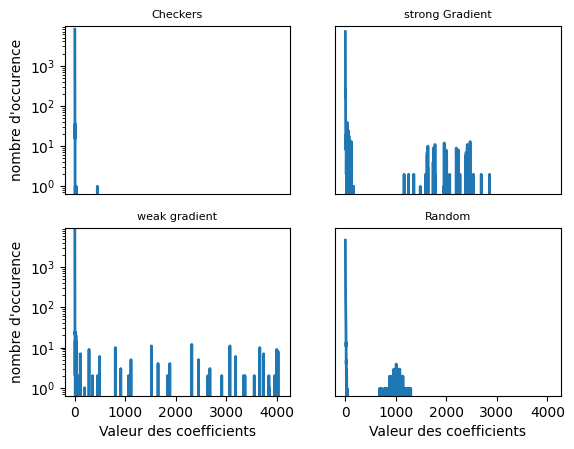

In [6]:
coef=[[8067, 59, 63, 24, 15, 36, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7045, 437, 165, 251, 128, 97, 61, 35, 10, 13, 19, 19, 16, 8, 18, 15, 7, 2, 3, 5, 5, 1, 9, 26, 24, 27, 8, 12, 0, 15, 2, 11, 0, 1, 0, 28, 39, 2, 0, 8, 17, 2, 0, 0, 4, 9, 0, 0, 17, 22, 0, 0, 0, 1, 0, 0, 0, 24, 3, 0, 13, 1, 0, 24, 15, 0, 1, 14, 0, 0, 0, 8, 18, 2, 0, 12, 0, 0, 0, 0, 14, 0, 0, 0, 9, 4, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 10, 3, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9639, 201, 113, 21, 25, 6, 2, 15, 0, 0, 1, 2, 8, 2, 10, 6, 7, 2, 1, 11, 7, 9, 4, 20, 3, 14, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4728, 1083, 612, 363, 247, 153, 124, 85, 64, 59, 46, 38, 16, 18, 11, 14, 10, 4, 5, 1, 3, 1, 1, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 3, 1, 4, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 3, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]




M=0
m=0
differentcoeff=[]
for i in coef:
    if len(i)>M:
        M=len(i)

    if i[0]>m:
        m=i[0]
    differentcoeff.append(len(list(filter(lambda a: a != 0, i)))/len(i))
x=range(M)
print(differentcoeff)

fig, axs = plt.subplots(ncols=2, nrows=2)      

title=["Checkers","strong Gradient","weak gradient","Random"]

for i in range(2):
    for j in range(2):
        axs[i][j].semilogy(x,coef[2*i+j]+[0]*(M-len(coef[2*i+j])) , linewidth=2.0, label="Img"+str(2*i+j))
        axs[i][j].set_title(title[2*i+j])
        axs[i][j].title.set_size(8)
        axs[i][j].set_ylim([0, m])
        if j!=0:
            axs[i][j].get_yaxis().set_visible(False)
        if j==0:
            axs[i][j].set_ylabel('nombre d\'occurences')
        if i!=1:
            axs[i][j].get_xaxis().set_visible(False)
        if i==1:
            axs[i][j].set_xlabel('Valeur des coefficients')
